In [35]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
#assign path
path = r'C:\Users\artoe\Documents\DataAnalytics\Data Immersion\Exercises\Achievement 6\data'

In [37]:
#import data
df_airbnb_complete = pd.read_pickle(os.path.join(path, 'airbnb_complete_data_monthly.pkl'))

In [38]:
df_airbnb_complete.shape

(5613790, 73)

In [39]:
df_airbnb_complete.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighbourhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'host_id', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_identity_verified', 'street', 'neighbourhood', 'city', 'state',
       'zipcode', 'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_365', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scor

In [40]:
df_airbnb_complete['id'].value_counts()

id
82482       9035
1469096     8203
1814121     7878
785432      7826
152280      7540
            ... 
3119291       13
3098861       13
27027037      13
18031676      13
30550093      13
Name: count, Length: 17624, dtype: int64

In [41]:
#create subset with variables to potentially use
df_sub = df_airbnb_complete[['review_scores_rating','price','avg_price_in_month','monthly_availability_rate','distance_from_center','review_scores_location','review_scores_value']]

In [42]:
df_sub.duplicated().sum()

5541767

In [43]:
df_sub_nodups = df_sub.drop_duplicates()

In [44]:
df_sub_nodups.shape

(72023, 7)

In [45]:
#check for nulls
df_sub_nodups.isnull().sum()

review_scores_rating           835
price                           13
avg_price_in_month           31076
monthly_availability_rate        0
distance_from_center             0
review_scores_location         879
review_scores_value            877
dtype: int64

In [46]:
#dropping columns with too many nulls
df_sub_nodups.drop(columns='avg_price_in_month', inplace=True)

C:\Users\artoe\AppData\Local\Temp\ipykernel_8524\3630872147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub_nodups.drop(columns='avg_price_in_month', inplace=True)


In [47]:
#since the number of nulls in price is so small, it might be safe to impute the mean value in their place
df_sub_nodups['price'].fillna(df_sub['price'].mean(), inplace=True)

C:\Users\artoe\AppData\Local\Temp\ipykernel_8524\3694840517.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sub_nodups['price'].fillna(df_sub['price'].mean(), inplace=True)
C:\Users\artoe\AppData\Local\Temp\ipykernel_8524\3694840517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub_nodups['price'].fillna(df_sub['price'].mean(),

In [48]:
df_sub_nodups.to_csv(os.path.join(path, 'calendar_data_extended.csv'))

In [63]:
df_sub_nodups.isnull().sum()

review_scores_rating         835
price                          0
monthly_availability_rate      0
distance_from_center           0
review_scores_location       879
review_scores_value          877
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

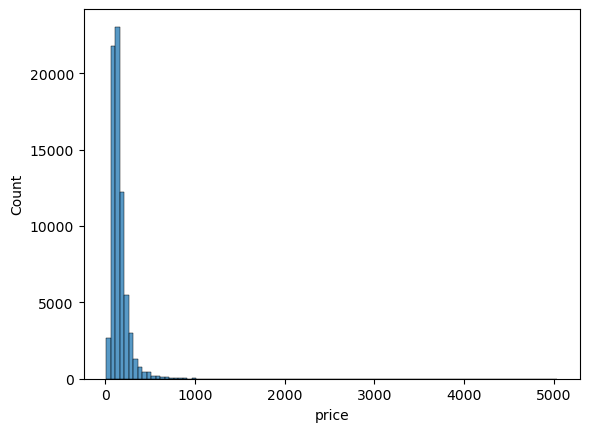

In [65]:
#plotting price with monthly availability rate
#checking for extreme values
sns.histplot(df_sub_nodups['price'], bins=100)

In [67]:
#checking mean, median and max for price
df_sub_nodups['price'].mean()

155.7434813416435

In [69]:
df_sub_nodups['price'].median()

130.0

In [71]:
df_sub_nodups['price'].max()
#these higher values have been checked and are not outliers

5040.0

#### Preparing data for regression analysis

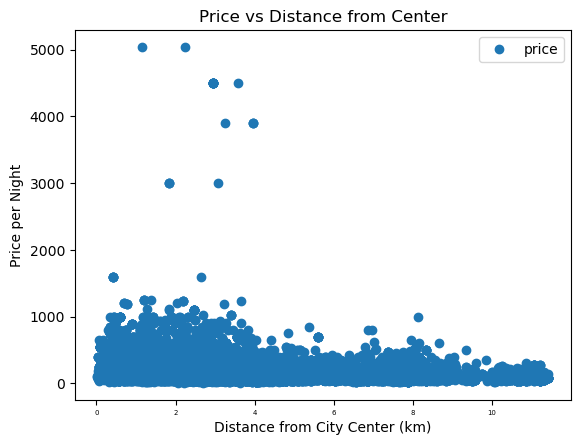

In [73]:
df_sub_nodups.plot(x = 'distance_from_center', y='price', style="o") 
plt.title('Price vs Distance from Center')  
plt.xlabel('Distance from City Center (km)')  
plt.xticks(fontsize=5)
plt.ylabel('Price per Night')  
plt.show()

##### The highest priced listings are all located within 5km of the city center. The prices also tend to be lower the further the listing is from the center.

In [75]:
#reshaping values into numpy arrays
X = df_sub_nodups['distance_from_center'].values.reshape(-1,1)
y = df_sub_nodups['price'].values.reshape(-1,1)

In [77]:
X

array([[3.43001104],
       [3.43001104],
       [3.43001104],
       ...,
       [0.51783539],
       [2.12982059],
       [2.12982059]])

In [79]:
y

array([[59.],
       [59.],
       [59.],
       ...,
       [40.],
       [40.],
       [40.]])

In [81]:
#split this data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [83]:
#create regression object
regression = LinearRegression()

In [85]:
regression.fit(X_train, y_train)

LinearRegression()

In [87]:
#predicting the values of y
y_predicted = regression.predict(X_test)

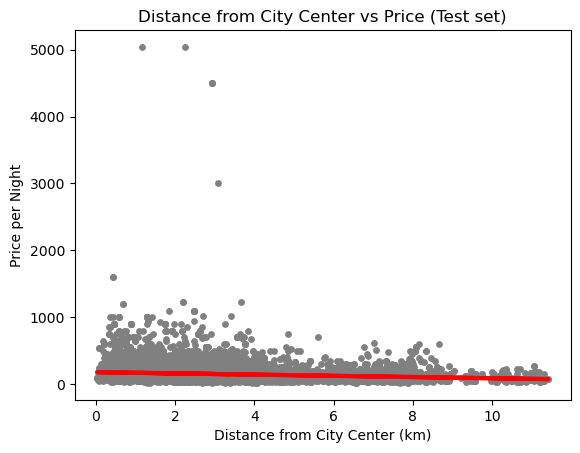

In [89]:
#creating scatterplot with regression line based on test data
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Distance from City Center vs Price (Test set)')
plot_test.xlabel('Distance from City Center (km)')
plot_test.ylabel('Price per Night')
plot_test.show()

##### As observed in the scatterplot, there is a slight negative regression.

In [93]:
#defining objects for summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [95]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-9.07350788]]
Mean squared error:  14802.81802876858
R2 score:  0.017895992154792872


##### There is a very slight negative relationship between price and distance from city center. However, as evidenced by the high RMSE and low R2 score, this model is not the best representation of this relationship, as most of the data points do not fall near the regression line.

In [97]:
#predicting the y values
y_predicted

array([[149.42659533],
       [152.98112132],
       [165.19294686],
       ...,
       [134.95624657],
       [171.06264948],
       [168.90284936]])

In [99]:
#creating a df with actual and predicted y values
data_yvalues = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_yvalues.head(30)

,Actual,Predicted
0,149.0,149.426595
1,130.0,152.981121
2,249.0,165.192947
3,125.0,160.720381
4,99.0,174.698271
5,450.0,171.543933
6,120.0,157.539196
7,160.0,159.039992
8,175.0,165.894793
9,107.0,165.900715


In [101]:
#fit regression to training data
y_predicted_train = regression.predict(X_train)

In [103]:
#defining objects for summary statistics
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [105]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-9.07350788]]
Mean squared error:  13744.032745593047
R2 score:  0.01780428533366818


##### The model does not fit the training data much differently than it fits the test data. The slope and rmse values are almost identical.
##### The r2 score is slightly lower than with the test data, indicating that the variation in this data is much too high for a regression model.

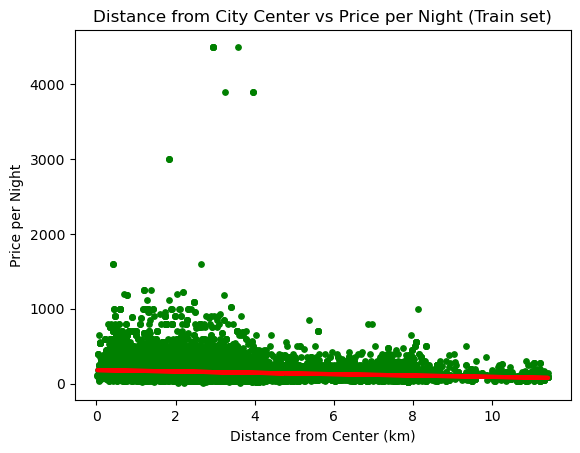

In [107]:
#visualizing the results with the training data
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Distance from City Center vs Price per Night (Train set)')
plot_test.xlabel('Distance from Center (km)')
plot_test.ylabel('Price per Night')
plot_test.show()

##### Overall, this model would not be appropriate for accurately predicting the relationship between an AirBnb listing's distance from the city center and its price. There is simply too much variance within the data that cannnot be explained by a linear regression model. 
##### It seems that proximity to the very center does not have as much of an effect on listing price as thought. 
##### One possible bias that this data could contain would be selection bias, as prices for listings are often set by AirBnB hosts themselves, who often wish to make a profit rather than truly reflect the market value of a rental property in their area. 